In [43]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

The goal of this notebook is to conduct all the preparation steps to make the Transaction dataset ready for analysis

### 1. Loading the dataset 

In [2]:
data = pd.read_excel("../Datasets/Initial/QVI_transaction_data.xlsx")
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
data.shape

(264836, 8)

In [4]:
data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [5]:
ProfileReport(data)

### 2. Quality assessment

#### a. Inconsistency : Differents unit prices for the same product

In [50]:
# create a unit price column
data["UNIT_PRICE"] = round(data["TOT_SALES"] / data["PROD_QTY"],2)

In [51]:
product_list = data["PROD_NBR"].unique()

In [52]:
# verify if unit price is always the same for a given product
dic = {}
for i in product_list:
    temp = data[data["PROD_NBR"]==i]["UNIT_PRICE"].unique()
    if temp.shape[0] != 1:
        dic[i] = data[data["PROD_NBR"]==i]["UNIT_PRICE"]
# dic is constituted of transactions concerning same products with different unit prices   
    

In [68]:
# for each transaction over a product we assume that a different (from the mode) unit price 
# is due to an error and we replace it by the mode.
data1 = data.copy()
for v in dic:
    data1.loc[data1["PROD_NBR"]==v, "UNIT_PRICE"] = dic[v].value_counts().index[0]

In [116]:
data1.to_csv("../Datasets/Interim/transaction_data_without_inconsistencies_on_unit_price.csv")

#### b. Outliers

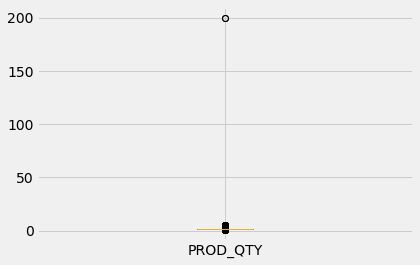

In [69]:
data1.boxplot(column="PROD_QTY");

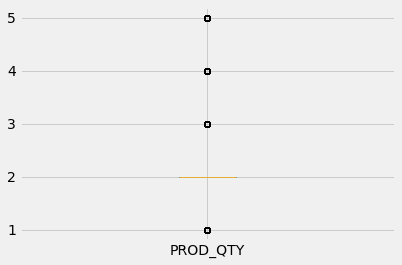

In [70]:
data1[data1["PROD_QTY"]<50].boxplot(column="PROD_QTY");

In [71]:
data1.loc[data1["PROD_QTY"]>50].index

Int64Index([69762, 69763], dtype='int64')

We can clearly see that there is an outlier there. Let erase it.

In [100]:
data2 = data1[data1["PROD_QTY"]<50]

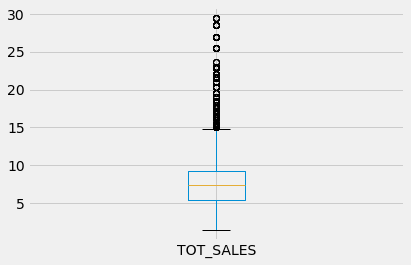

In [101]:
data2.boxplot(column="TOT_SALES");

In [115]:
data2.to_csv("../Datasets/Interim/transaction_data_without_outliers.csv")

No obvious outliers for this one

#### c. Duplicates

In [103]:
data2[data2.duplicated() ]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,UNIT_PRICE
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,3.0


There is 1 lines duplicated. We will erase it

In [113]:
data3 = data2[data2.duplicated()==False]

In [114]:
data3.to_csv("../Datasets/Interim/transaction_data_without_duplicates.csv")

#### d. Missing values

No missing values

### 2. Feature Aggregation

No interesting feature aggregation to do here

### 3.Feature Selection

We will delete PROD_NAME  and TOT_SALES columns

In [111]:
data4 = data3[['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'UNIT_PRICE']]

In [112]:
data4.to_csv("../Datasets/Processed/transaction_data_preprocessed.csv")